In [1]:
#%% import data and packages
# set work directory
import os
os.chdir('D:\\fault_sensor_data\\python_file')


import matplotlib.pyplot as plt
from read_data_ver2 import * 
import numpy as np



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
done


In [2]:
index1_ = 7.8e3 # the step before stick
index2_ = 8.4e3 # the step after stick
index_ = 7900  # the selected step
individuals_ =    [int(i_) for i_ in range(286,2203)] # record the grain number
xbefore_ = np.zeros(len(individuals_))
xafter_ = np.zeros(len(individuals_))
ybefore_ = np.zeros(len(individuals_))
yafter_ = np.zeros(len(individuals_))
x_ = np.zeros(len(individuals_))
y_ = np.zeros(len(individuals_))  # store the y of the maximum v point
vx_ =  np.zeros(len(individuals_)) # store the vx of the maximum v point
vy_ = np.zeros(len(individuals_)) # store the vx of the maximum v point
abs_vx_ = np.zeros(len(individuals_)) # store the abs_vx of the maximum v point
vxbefore_ = np.zeros(len(individuals_))
vxafter_ = np.zeros(len(individuals_))

In [3]:
#%% get the x and y coodinate before and after the large drop
count_ = 0
for i_ in individuals_:
    xbefore_[count_] = sensors_[i_].loc[index1_, 'cx']
    xafter_[count_] = sensors_[i_].loc[index2_, 'cx']
    ybefore_[count_] = sensors_[i_].loc[index1_, 'cy']
    yafter_[count_] = sensors_[i_].loc[index2_, 'cy']
    vxbefore_[count_] = sensors_[i_].loc[index1_, 'vx']
    vxafter_[count_] = sensors_[i_].loc[index2_, 'vx']
    x_[count_] = sensors_[i_].loc[index_, 'cx']
    y_[count_] = sensors_[i_].loc[index_, 'cy']
    vx_[count_] = sensors_[i_].loc[index_, 'vx']
    vy_[count_] = sensors_[i_].loc[index_, 'vy']
    abs_vx_[count_] = abs(vx_[count_])
    count_ += 1

In [4]:
#%% Screen particles according to x
def screen_grains_by_x(l_lim_, u_lim_, x_, v_):
    '''
    l_lim_ - lower limit
    u_lim_ - upper limit
    x_ - x coodinate
    v_ - corresponding variables
    
    returns:
        xnew_ - the x coodinate in a centain range
        vnew_ - the correspnding coodinate in a certain range
    
    '''
    xnew_, vnew_ = [], [] # initialize
    for i_ in range(len(x_)):
        if x_[i_] > l_lim_ and x_[i_] < u_lim_:
            xnew_.append(x_[i_])
            vnew_.append(v_[i_])

    return np.array(xnew_), np.array(vnew_)  # return handled coodinate and variables.

xnew_, ynew_ = screen_grains_by_x(0, 500, x_, y_)
xnew_, vnew_ = screen_grains_by_x(0, 500, x_, vx_)


In [5]:
#%% average over a certain distance
def average_along_y(y_, v_, n_):
    '''
    y_ - the y coodinate
    v_ - the corresponding coordinate
    n_ - the number of bins

    Returns
    -------
    centers_ - the center of each bins
    values_ - the average value of each bins

    '''
    centers_, values_ = np.zeros(n_), np.zeros(n_)
    count_ = np.zeros(n_)
    max_ = np.max(y_)
    min_ = np.min(y_)
    range_ = (max_ - min_)
    bins_ = np.linspace(min_, max_, n_ + 1)

    # calculate centers
    for i_ in range(n_):
        centers_[i_] = (bins_[i_] + bins_[i_+ 1]) / 2
    
    # calculate values
    for i_ in range(len(y_)):
        index_ = int( (y_[i_] - min_) / (max_ - min_) * n_ )
        if index_ == n_:
            index_ -= 1
        values_[index_] += v_[i_]
        count_[index_] += 1
        # print(index_)
    values_ = values_/count_
    # print(max_)
    # print(min_)
    # print(centers_)
    return centers_, values_
    
centers_, values_ = average_along_y(ynew_, vnew_, 10)    

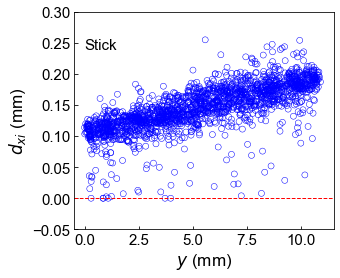

In [6]:
#%% plot() displacement all scatter
fig = plt.figure(figsize=(6/82.767*64.261, 4)) 


plt.rc('font', family = 'Arial')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 15
plt.scatter(ybefore_ - ybefore_.min(), xafter_ - xbefore_, c = 'none', edgecolor = 'b', linewidth = 0.5)
plt.ylim([-0.05,0.3])
plt.xlim([-0.5, 11.5])
plt.xlabel('$\\mathit{y}$ (mm)', fontsize = 17)
plt.ylabel('$\\mathit{d}_{xi}$ (mm)', fontsize = 17)
# plt.title('Stick')
plt.text( 0, 0.24, 'Stick')
# plt.legend( frameon = False ) 
plt.axhline(0, linestyle = '--', color = 'r',linewidth = 1)
plt.savefig('stick displacement all scatter.svg', dpi=600, format='svg')
plt.show()


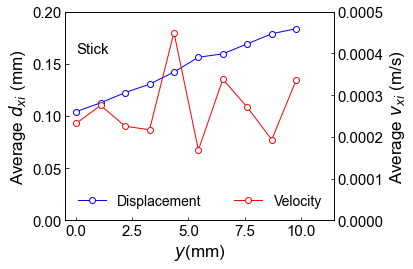

In [7]:
#%% plot() displacement all average
#%% plot() velocity all average along y
centers_, velocity_ = average_along_y(y_, vx_, 10)    
centers_, displacement_ = average_along_y(ybefore_, xafter_ - xbefore_, 10)   

plt.rc('font', family = 'Arial')
plt.rcParams['font.size'] = 15
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(centers_ - centers_.min(), displacement_ , 'b',label="Displacement", marker = 'o',markerfacecolor = 'w', linewidth = 1);
ax1.set_ylabel('Average $\\mathit{d}_{xi}$ (mm)', fontsize = 17);
plt.axhline(0, linestyle = '--', color = 'y',linewidth = 1)
ax1.set_ylim([0, 0.2])
ax1.set_xlim([-0.5, 11.5])

ax1.set_xlabel('$\\mathit{y}$(mm)', fontsize = 17);
ax2 = ax1.twinx() # this is the important function
ax2.plot(centers_ - centers_.min(), velocity_, 'r', label = "Velocity", marker = 'o',markerfacecolor = 'w', linewidth = 1)
ax2.set_ylabel('Average $\\mathit{v}_{xi}}$ (m/s)', fontsize = 17);
ax2.set_ylim([0, 0.0005])
plt.axhline(0, linestyle = '--', color = 'g',linewidth = 1)
# plt.title('Stick')
plt.text( 0, 0.0004, 'Stick')


ax1.legend(loc=3, frameon = False, fontsize = 14)
ax2.legend(loc=4, frameon = False, fontsize = 14)
plt.tight_layout()
plt.savefig('stick velocity all average displacenment and velocity .svg', dpi=600, format='svg')
plt.show()

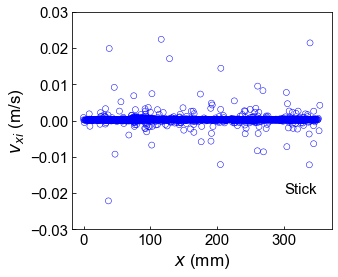

In [8]:

#%% plot() velocity all scatter along x
fig = plt.figure(figsize=(6/82.767*64.261, 4)) 
plt.rc('font', family = 'Arial')
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.scatter(x_ - x_.min(), vx_, c = 'none', edgecolor = 'b', linewidth = 0.5)
plt.ylim(-0.03, 0.03)
plt.xlabel('$\\mathit{x}$ (mm)', fontsize = 17)
plt.ylabel('$\\mathit{v}_{xi}$ (m/s)', fontsize = 17)
# plt.title('Stick')
# plt.legend( frameon = False ) 
plt.text( 300, -0.02, 'Stick')
plt.savefig('stick velocity all scatter along x.svg', dpi=600, format='svg')
plt.show()

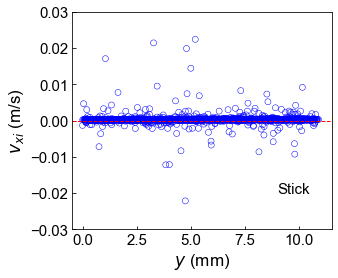

In [9]:
#%% plot() velocity all scatter along y
fig = plt.figure(figsize=(6/82.767*64.261, 4)) 


plt.rc('font', family = 'Arial')
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.scatter(y_ - y_.min(), vx_, c = 'none', edgecolor = 'b', linewidth = 0.5)

plt.xlabel('$\\mathit{y}$ (mm)', fontsize = 17)
plt.ylabel('$\\mathit{v}_{xi}$ (m/s)', fontsize = 17)
# plt.title('Stick')
plt.text( 9, -0.02, 'Stick')
plt.ylim(-0.03, 0.03)
plt.xlim([-0.5, 11.5])
# plt.legend( frameon = False ) 
plt.axhline(0, linestyle = '--', color = 'r',linewidth = 1)
plt.savefig('stick velocity all scatter along y.svg', dpi=600, format='svg')
plt.show()

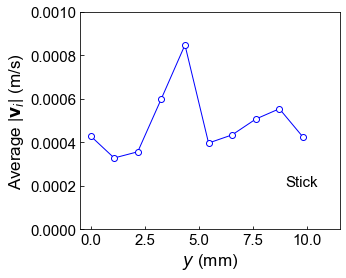

In [10]:
#%% plot() abs velocity all average along y
fig = plt.figure(figsize=(6/82.767*64.261, 4)) 
plt.rc('font', family = 'Arial')
plt.rcParams['font.size'] = 15
centers_, values_ = average_along_y(y_, abs_vx_, 10)    
plt.plot(centers_ - centers_.min(), values_, marker = 'o',markerfacecolor = 'w', linewidth = 1, color = 'b')
plt.ylim(0,0.001)
plt.xlim([-0.5, 11.5])
plt.xlabel('$\\mathit{y}$ (mm)', fontsize = 17)
plt.ylabel('Average |$\\mathbf{v}_{i}$| (m/s)', fontsize = 17)
# plt.title('Stick')
plt.text( 9, 0.0002, 'Stick')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.savefig('stick velocity all average magnitude of velocity.svg', dpi=600, format='svg')
plt.show()
